In [1]:
from tensorflow import keras
model = keras.models.load_model('C:/Users/Srikanth/Downloads/DC/MNIST_keras_CNN.h5')

In [2]:
model.summary()

Model: "MNIST_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 32)        9248      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        

In [3]:
model.load_weights('C:/Users/Srikanth/Downloads/DC/MNIST_keras_w_CNN.h5')

In [ ]:
'''
from tensorflow.keras.applications import InceptionV3
model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
model.summary()
'''

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [5]:
input_dir = 'C:/Users/Srikanth/Downloads/DC/roman_numbers'
glob_dir = input_dir + '/*.png'
images = [cv2.resize(cv2.imread(file), (28, 28)) for file in glob.glob(glob_dir)]
paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)

In [6]:
images.shape

(2880, 2352)

In [7]:
from tensorflow.keras.models import Model
import keras
flatten_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer('flatten_1').output)

Using TensorFlow backend.


In [8]:
predictions = flatten_layer_model.predict(images.reshape(-1, 28, 28, 1))
pred_images = predictions.reshape(images.shape[0], -1)

In [9]:
pred_images.shape

(2880, 3072)

In [15]:
# DBScan
'''
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=2, min_samples=3).fit(pred_images)
clustering.labels_
'''

array([-1,  0, -1, ..., -1, -1, -1], dtype=int64)

In [ ]:
# PCA
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pred_images)
pred_images_data = scaler.transform(pred_images)
pred_images_data
'''

In [ ]:
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=22)
pca.fit(pred_images_data)
x = pca.transform(pred_images_data)
'''

In [ ]:
'''
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(x[:,0], x[:,1], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
'''

In [11]:
k = 10
kmodel = KMeans(n_clusters = k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
shutil.rmtree('C:/Users/Srikanth/Downloads/DC/Clusters/')
for i in range(k):
    os.makedirs('C:/Users/Srikanth/Downloads/DC/Cluster/' + str(i))
for i in range(len(paths)):
    shutil.copy2(paths[i], 'C:/Users/Srikanth/Downloads/DC/Cluster/'+str(kpredictions[i]))

c:\users\srikanth\anaconda3\envs\scrapping\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [13]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric = 'euclidean'))
    kl.append(k)

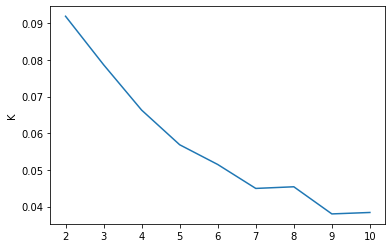

In [14]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()